# Project Description

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.

Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.

Additionally, measure the AUC-ROC metric and compare it with the F1.

# Initialization

In [4]:
# Load all the libraries

!pip install --user imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'imblearn'

# Load Data

In [5]:
# Load the data file
try:
    customers = pd.read_csv('/datasets/Churn.csv')
except:
    customers = pd.read_csv('Churn.csv')
    

# Explore the Data

In [6]:
# Print general information about the 'customers' dataframe
customers.info()
customers.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Print a sample of the data for 'customers'
customers


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [8]:
# Check all the unique values in the 'Geography' column
customers['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
# Check all the unique values in the 'Gender' column
customers['Gender'].unique()


array(['Female', 'Male'], dtype=object)

In [10]:
# Check all the unique values in the 'Tenure' column
customers['Tenure'].unique()


array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

0    7963
1    2037
Name: Exited, dtype: int64

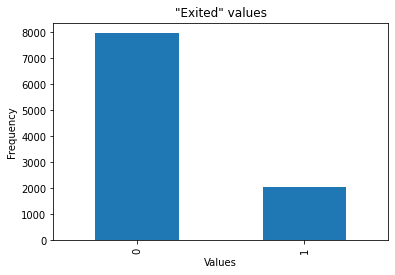

In [11]:
# Examine the frequencies of the values in the 'Exited' column
pd.value_counts(customers['Exited']).plot.bar()
plt.title('"Exited" values')
plt.xlabel('Values')
plt.ylabel('Frequency')
customers['Exited'].value_counts()


Based on the above exploration of the data, these are the potential issues that should be addressed:

1) There are features that have no relevance to whether or not a customer would leave the bank (i.e. 'RowNumber', 'CustomerId', and 'Surname')

2) There are 909 missing values in the 'Tenure' feature

3) There are two categorical features ('Geography' and 'Gender') that must be changed into dummy variables

4) The values in the 'Exited' target are unbalanced (the positives are far fewer than the negatives)

5) The numeric features are differently scaled

# Clean the Data

In [12]:
# Drop features that have no relation to the target ('RowNumber', 'CustomerId', and 'Surname')
customers = customers.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
customers


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [13]:
# Fill in missing values in the 'Tenure' column with the mean
customers['Tenure'].fillna(customers['Tenure'].mean(), inplace = True)
customers['Tenure'].isna().sum()


0

In [14]:
# Use One-Hot Encoding on the 'Geography' column to create separate columns for each feature value
geography_dummy = pd.get_dummies(customers['Geography'], drop_first = True)
customers = pd.concat([customers, geography_dummy], axis=1)
customers


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,France,Female,42,2.00000,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1.00000,83807.86,1,0,1,112542.58,0,0,1
2,502,France,Female,42,8.00000,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1.00000,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2.00000,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.00000,0.00,2,1,0,96270.64,0,0,0
9996,516,France,Male,35,10.00000,57369.61,1,1,1,101699.77,0,0,0
9997,709,France,Female,36,7.00000,0.00,1,0,1,42085.58,1,0,0
9998,772,Germany,Male,42,3.00000,75075.31,2,1,0,92888.52,1,1,0


In [15]:
# Use One-Hot Encoding on the 'Gender' column to create separate columns for each feature value
gender_dummy = pd.get_dummies(customers['Gender'], drop_first = True)
customers = pd.concat([customers, gender_dummy], axis=1)
customers


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,France,Female,42,2.00000,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1.00000,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8.00000,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1.00000,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2.00000,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.00000,0.00,2,1,0,96270.64,0,0,0,1
9996,516,France,Male,35,10.00000,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,France,Female,36,7.00000,0.00,1,0,1,42085.58,1,0,0,0
9998,772,Germany,Male,42,3.00000,75075.31,2,1,0,92888.52,1,1,0,1


In [16]:
# Drop the original 'Geography' and 'Gender' features
customers = customers.drop(['Geography', 'Gender'], axis = 1)
customers


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2.00000,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.00000,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.00000,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.00000,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.00000,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.00000,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.00000,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.00000,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.00000,75075.31,2,1,0,92888.52,1,1,0,1


The following changes were made through the data cleaning process to address the issues identified in the data exploration process:

1) The features that have no relation to the target ('RowNumber', 'CustomerId', and 'Surname') were dropped

2) The missing values in the 'Tenure' feature were filled with the mean value

3) The 'Geography' and 'Gender' features were One-Hot Encoded into separate columns

4) The imbalanced 'Exited' target is addressed using class balancing techniques below

5) The remaining numeric features are normalized below

# Examine the Balance of Classes

In [17]:
# Split the data into a training, validation, and test set
features = customers.drop(['Exited'], axis=1) # The features consists of all the columns except 'Exited'
target = customers['Exited'] # The target is the 'Exited' column

# Use train_test_split to create the training set (60% of the data) and the remaining data
features_train, features_rem, target_train, target_rem = train_test_split(features,
                                                                          target,
                                                                          train_size = 0.6,
                                                                          random_state = 12345)

# Use train_test_split to split the remaining data into the validation and test set (20% of the data each)
features_valid, features_test, target_valid, target_test = train_test_split(features_rem,
                                                                            target_rem,
                                                                            test_size = 0.5,
                                                                            random_state = 12345)


In [19]:
# Normalize the numeric features to ensure that the data is normalized
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_test


/tmp/ipykernel_253/1111049819.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_253/1111049819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7041,-2.226392,-0.088482,-1.101612,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.446348,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,-0.009629,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.810342,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.810342,0.615625,-0.891560,0,1,-1.070919,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9335,0.878668,1.050359,-0.373623,0.820368,0.830152,1,0,-1.650024,1,0,1
7999,1.802916,-1.227322,-0.009629,1.063628,-0.891560,0,0,-0.679113,0,0,1
6139,-0.004041,-0.183385,-0.373623,-1.233163,0.830152,1,0,0.760240,0,0,0
9473,-0.460973,0.575842,-0.373623,-1.233163,0.830152,0,0,-1.087632,0,1,1


In [16]:
# Train the Decision Tree Classifier model without taking into consideration the imbalance of classes

# Create a for loop to tune the model's max depth and identify the depth that produces the highest F1 score
best_model = None
best_score = 0

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth) # create a model with the given depth
    model.fit(features_train, target_train) # train the model using the training set
    score = f1_score(target_valid, model.predict(features_valid)) # calculate the F1 score using the validation set
    if score > best_score: # identify the best model based on F1 score
        best_model = model
        best_score = score
        
print("Accuracy of the best model on the validation set:", best_score) # calculate best model's F1 score using the validation set

best_model.fit(features_train, target_train) # train the best model using the training set
final_score = best_model.score(features_test, target_test) # calculate best model's accuracy score using the test set

print(f'Accuracy of the best model on the test set: {final_score}')

predicted_valid = best_model.predict(features_valid)

print(f'F1 score of the best model on the validation set: {f1_score(target_valid, predicted_valid)}')

predicted_test = best_model.predict(features_test)

print(f'F1 score of the best model on the test set: {f1_score(target_test, predicted_test)}')


Accuracy of the best model on the validation set: 0.5706293706293706
Accuracy of the best model on the test set: 0.8275
F1 score of the best model on the validation set: 0.5706293706293706
F1 score of the best model on the test set: 0.5293315143246929


In [17]:
# Calculate the ROC/AUC score for the Random Forest Classifier model using the balanced SMOTE data
probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc_final = roc_auc_score(target_test, probabilities_one_test)
print(f'ROC/AUC Score: {auc_roc_final}')


ROC/AUC Score: 0.7819909724751938


In [18]:
# Train the Random Forest Classifier model without taking into consideration the imbalance of classes

# Create a for loop to tune the model's number of estimators and identify the number that produces the highest F1 score
best_score = 0
best_est = 0

for est in range(1, 51): # choose hyperparameter range
    model = RandomForestClassifier(random_state = 12345, n_estimators = est) # set number of trees
    model.fit(features_train, target_train) # train model on training set
    score = f1_score(target_valid, model.predict(features_valid)) # calculate F1 score on validation set
    if score > best_score:
        best_score = score # save best accuracy score on validation set
        best_est = est # save number of estimators corresponding to best F1 score

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score)) # calculate best model's F1 score using the validation set

final_model = RandomForestClassifier(random_state = 12345, n_estimators = best_est)
final_model.fit(features_train, target_train) # train the best model using the training set
final_score = final_model.score(features_test, target_test) # calculate best model's F1 score using the test set

print(f'Accuracy of the best model on the test set: {final_score}')

predicted_valid = final_model.predict(features_valid)

print(f'F1 score of the best model on the validation set: {f1_score(target_valid, predicted_valid)}')

predicted_test = final_model.predict(features_test)

print(f'F1 score of the best model on the test set: {f1_score(target_test, predicted_test)}')


Accuracy of the best model on the validation set (n_estimators = 15): 0.5843023255813955
Accuracy of the best model on the test set: 0.844
F1 score of the best model on the validation set: 0.5843023255813955
F1 score of the best model on the test set: 0.5517241379310345


In [19]:
# Calculate the ROC/AUC score for the Random Forest Classifier model using the balanced SMOTE data
probabilities_test = final_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc_final = roc_auc_score(target_test, probabilities_one_test)
print(f'ROC/AUC Score: {auc_roc_final}')


ROC/AUC Score: 0.8316273680013072


A Decision Tree Classifier Model and a Random Forest Classifier model were used to calculate accuracy and F1 scores for the unbalanced dataset. The results were pretty similar to one another but as you'll see below in comparison to the balanced datasets, on the lower side. As for the ROC-AUC scores, the Decision Tree Classifier model results for the unbalanced dataset (0.78) was a little lower than that of the Random Forest Classifier model (0.83). However, the ROC-AUC scores for the unbalanced Random Forest Classifier had very similar results to the balanced Random Forest Classifier below (0.84). So while the two models have a similar ability to separate out classes, the unbalanced models have lower levels of precision and recall than the balanced models. 

# Fix the Imbalance of Classes

In [20]:
# Use SMOTE to oversample the minority class
sm = SMOTE(random_state = 12345)
features_train_sm, target_train_sm = sm.fit_resample(features_train, target_train)


In [21]:
# Examine the value counts of 'target_train' prior to implementing SMOTE
target_train.value_counts()


0    4804
1    1196
Name: Exited, dtype: int64

In [22]:
# Examine the value counts of 'target_train_sm' after implementing SMOTE
target_train_sm.value_counts()


0    4804
1    4804
Name: Exited, dtype: int64

In [23]:
# Use RandomUnderSampler to undersample the majority class
rus = RandomUnderSampler(random_state = 12345, replacement = True)
features_train_rus, target_train_rus = rus.fit_resample(features_train, target_train)


In [24]:
# Examine the value counts of 'target_train_rus' after implementing RandomUnderSampler
target_train_rus.value_counts()


0    1196
1    1196
Name: Exited, dtype: int64

In order to address the class imbalance, SMOTE was used to oversample the data and RandomUnderSampler was used to undersample the data.

# Train and Select the Best Model

In [25]:
# Train the Decision Tree Classifier model using the balanced SMOTE data

# Create a for loop to tune the model's max depth and identify the depth that produces the highest F1 score
best_model = None
best_score = 0

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth) # create a model with the given depth
    model.fit(features_train_sm, target_train_sm) # train the model using the training set
    score = f1_score(target_valid, model.predict(features_valid))
    if score > best_score: # identify the best model based on F1 score
        best_model = model
        best_score = score
        
print("Accuracy of the best model on the validation set:", best_score) # calculate best model's accuracy score using the validation set

best_model.fit(features_train_sm, target_train_sm) # train the best model using the training set
final_score = best_model.score(features_test, target_test) # calculate best model's accuracy score using the test set

print(f'Accuracy of the best model on the test set: {final_score}')

predicted_valid = best_model.predict(features_valid)

print(f'F1 score of the best model on the validation set: {f1_score(target_valid, predicted_valid)}')

predicted_test = best_model.predict(features_test)

print(f'F1 score of the best model on the test set: {f1_score(target_test, predicted_test)}')


Accuracy of the best model on the validation set: 0.5703703703703703
Accuracy of the best model on the test set: 0.7735
F1 score of the best model on the validation set: 0.5703703703703703
F1 score of the best model on the test set: 0.5706161137440758


In [26]:
# Train the Random Forest Classifier model using the balanced SMOTE data

# Create a for loop to tune the model's number of estimators and identify the number that produces the highest F1 score
best_score = 0
best_est = 0

for est in range(1, 50): # choose hyperparameter range
    model = RandomForestClassifier(random_state = 12345, n_estimators = est) # set number of trees
    model.fit(features_train_sm, target_train_sm) # train model on training set
    score = f1_score(target_valid, model.predict(features_valid)) # calculate F1 score on validation set
    if score > best_score:
        best_score = score # save best F1 score on validation set
        best_est = est # save number of estimators corresponding to best F1 score

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score)) # calculate best model's accuracy score using the validation set

final_model = RandomForestClassifier(random_state = 12345, n_estimators = best_est)
final_model.fit(features_train_sm, target_train_sm) # train the best model using the training set
final_score = final_model.score(features_test, target_test) # calculate best model's accuracy score using the test set

print(f'Accuracy of the best model on the test set: {final_score}')

predicted_valid = final_model.predict(features_valid)

print(f'F1 score of the best model on the validation set: {f1_score(target_valid, predicted_valid)}')

final_predicted_test = final_model.predict(features_test)

print(f'F1 score of the best model on the test set: {f1_score(target_test, final_predicted_test)}')


Accuracy of the best model on the validation set (n_estimators = 40): 0.5887961859356377
Accuracy of the best model on the test set: 0.8315
F1 score of the best model on the validation set: 0.5887961859356377
F1 score of the best model on the test set: 0.592503022974607


In [27]:
# Train the Decision Tree Classifier model using the balanced RandomUnderSampler data

# Create a for loop to tune the model's max depth and identify the depth that produces the highest F1 score
best_model = None
best_score = 0

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth) # create a model with the given depth
    model.fit(features_train_rus, target_train_rus) # train the model using the training set
    score = f1_score(target_valid, model.predict(features_valid)) # calculate the F1 score using the validation set
    if score > best_score: # identify the best model based on F1 score
        best_model = model
        best_score = score
        
print("Accuracy of the best model on the validation set:", best_score) # calculate best model's accuracy score using the validation set

best_model.fit(features_train_rus, target_train_rus) # train the best model using the training set
final_score = best_model.score(features_test, target_test) # calculate best model's accuracy score using the test set

print(f'Accuracy of the best model on the test set: {final_score}')

predicted_valid = best_model.predict(features_valid)

print(f'F1 score of the best model on the validation set: {f1_score(target_valid, predicted_valid)}')

predicted_test = best_model.predict(features_test)

print(f'F1 score of the best model on the test set: {f1_score(target_test, predicted_test)}')


Accuracy of the best model on the validation set: 0.5659690627843494
Accuracy of the best model on the test set: 0.759
F1 score of the best model on the validation set: 0.5659690627843494
F1 score of the best model on the test set: 0.5657657657657658


In [28]:
# Train the Random Forest Classifier model using the balanced RandomUnderSampler data

# Create a for loop to tune the model's number of estimators and identify the number that produces the highest F1 score
best_score = 0
best_est = 0

for est in range(1, 30): # choose hyperparameter range
    model = RandomForestClassifier(random_state = 12345, n_estimators = est) # set number of trees
    model.fit(features_train_rus, target_train_rus) # train model on training set
    score = f1_score(target_valid, model.predict(features_valid)) # calculate F1 score on validation set
    if score > best_score:
        best_score = score # save best F1 score on validation set
        best_est = est # save number of estimators corresponding to best F1 score

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score)) # calculate best model's accuracy score using the validation set

best_model = RandomForestClassifier(random_state = 12345, n_estimators = best_est)
best_model.fit(features_train_rus, target_train_rus) # train the best model using the training set
best_score = final_model.score(features_test, target_test) # calculate best model's accuracy score using the test set

print(f'Accuracy of the best model on the test set: {final_score}')

predicted_valid = best_model.predict(features_valid)

print(f'F1 score of the best model on the validation set: {f1_score(target_valid, predicted_valid)}')

predicted_test = best_model.predict(features_test)

print(f'F1 score of the best model on the test set: {f1_score(target_test, predicted_test)}')


Accuracy of the best model on the validation set (n_estimators = 18): 0.5959409594095941
Accuracy of the best model on the test set: 0.759
F1 score of the best model on the validation set: 0.5959409594095941
F1 score of the best model on the test set: 0.5711610486891385


Based on the results of the training and testing of the Decision Tree Classifier Model and a Random Forest Classifier on both the SMOTE and RandomUnderSampler balanced data, the Random Forest Classifier model using the balanced SMOTE data produced the best results:

Accuracy of the best model on the validation set (n_estimators = 40): 0.5887961859356377

Accuracy of the best model on the test set: 0.8315

F1 score of the best model on the validation set: 0.5887961859356377

F1 score of the best model on the test set: 0.592503022974607 (over the required minimum of 0.59)


# Perform Final Testing

In [29]:
# Calculate the ROC/AUC score for the Random Forest Classifier model using the balanced SMOTE data
probabilities_test = final_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc_final = roc_auc_score(target_test, probabilities_one_test)
print(f'ROC/AUC Score: {auc_roc_final}')


ROC/AUC Score: 0.8372512071428678


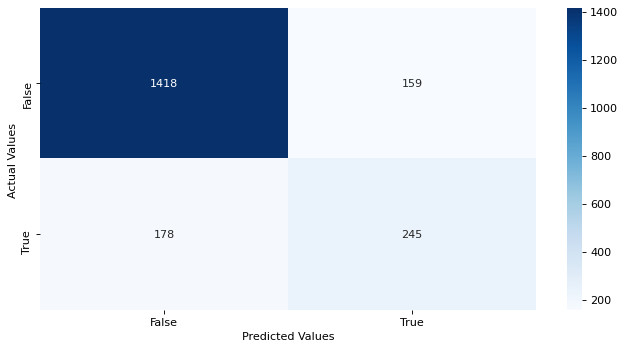

In [30]:
# Plot a confusion matrix to visualize the 
cf_matrix = confusion_matrix(target_test, final_predicted_test)
plt.figure(figsize=(10, 5), dpi=80)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()


The AUC/ROC score for the Random Forest Classifier model using the balanced SMOTE data is 0.84. Since this value is substantially higher than 0.5 (no ability to separate out classes), it indicates that the model does have a good measure of separability. This metric is higher than the obtained F1 value of 0.59 which is an indicator of precision and recall. Based on the values in the confusion matrix, the True Positive Rate is 0.58 and the True Negative Rate is 0.90. The model is better at predicting negative classes than positive classes but it performs better than random for both.

# Conclusion

The **Random Forest Classifier model using the balanced SMOTE data**, which is able to produce an accuracy score of 0.83 and an F1 score of 0.59 with the test data, is the best model that Beta Bank can utilize from this analysis to predict whether a customer will leave their bank. 